In [19]:
import tensorflow as tf
import ssl
import seaborn as sns
import numpy as np
import matplotlib.pyplot as plt

from tensorflow import keras
from tensorflow.keras.layers import Dense, Conv2D, MaxPooling2D,Flatten, Activation, BatchNormalization, Flatten, Dropout
from tensorflow.keras.utils import to_categorical
from tensorflow.keras.regularizers import l2
from tensorflow.keras.models import Sequential
from tensorflow.keras.datasets import mnist, cifar10 # 灰階圖資

In [8]:
# global setting
# 變數名稱都是大寫
EPOCHS = 30
IMG_SHAPE =(32,32,3)
CLS = 10
BSIZE = 256
LEARN_RATE = 0.001
L2 = 0.005

In [9]:
ssl._create_default_https_context = ssl._create_unverified_context
(x_train, y_train), (x_test, y_test) = cifar10.load_data()

In [10]:
print(f'The shape of training set x_train is {x_train.shape}')
print(f'The shape of testing set x_test is {x_test.shape}')

The shape of training set x_train is (50000, 32, 32, 3)
The shape of testing set x_test is (10000, 32, 32, 3)


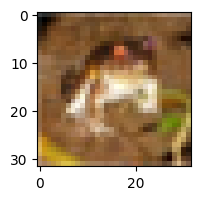

In [11]:
# plt.figure(figsize=(2,2))
# plt.imshow(x_train[0])

In [12]:
## Normalization
x_train = x_train.astype('float32') / 255.0 #cast to float32 datatype
x_test = x_test.astype('float32') / 255.0 #cast to float32 datatype

## y: Conver a label to a probability vector
y_train = to_categorical(y_train, CLS)
y_test = to_categorical(y_test, CLS)

In [13]:
# Construct CNN model
model = Sequential()
model.add(Conv2D(filters=16, kernel_size=(2,2), input_shape=IMG_SHAPE, padding='same', activation='relu'))
model.add(MaxPooling2D(pool_size=2))

model.add(Conv2D(filters=32, kernel_size=(2,2), padding='same', activation='relu'))
model.add(MaxPooling2D(pool_size=2))

model.add(Conv2D(filters=64, kernel_size=(2,2), padding='same', activation='relu'))
model.add(MaxPooling2D(pool_size=2))

model.add(Conv2D(filters=128, kernel_size=(2,2), padding='same', activation='relu'))
model.add(MaxPooling2D(pool_size=2))

model.add(Flatten())
model.add(Dense(128, activation='relu'))
#output layer
model.add(Dense(CLS,activation = 'softmax'))
print(model.summary())

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 32, 32, 16)        208       
                                                                 
 max_pooling2d (MaxPooling2  (None, 16, 16, 16)        0         
 D)                                                              
                                                                 
 conv2d_1 (Conv2D)           (None, 16, 16, 32)        2080      
                                                                 
 max_pooling2d_1 (MaxPoolin  (None, 8, 8, 32)          0         
 g2D)                                                            
                                                                 
 conv2d_2 (Conv2D)           (None, 8, 8, 64)          8256      
                                                                 
 max_pooling2d_2 (MaxPoolin  (None, 4, 4, 64)          0

In [14]:
model.compile(loss='categorical_crossentropy', optimizer='adam', metrics=['accuracy'])

In [16]:
h3 = model.fit(x_train, y_train, batch_size = BSIZE, epochs=EPOCHS, validation_split=0.2)

Epoch 1/30
157/157 [==============================] - 5s 32ms/step - loss: 1.8910 - accuracy: 0.3081 - val_loss: 1.6265 - val_accuracy: 0.4013
Epoch 2/30
157/157 [==============================] - 5s 34ms/step - loss: 1.5302 - accuracy: 0.4430 - val_loss: 1.5062 - val_accuracy: 0.4594
Epoch 3/30
157/157 [==============================] - 5s 34ms/step - loss: 1.4042 - accuracy: 0.4891 - val_loss: 1.3696 - val_accuracy: 0.4991
Epoch 4/30
157/157 [==============================] - 5s 31ms/step - loss: 1.3063 - accuracy: 0.5302 - val_loss: 1.2778 - val_accuracy: 0.5403
Epoch 5/30
157/157 [==============================] - 5s 33ms/step - loss: 1.2387 - accuracy: 0.5563 - val_loss: 1.2356 - val_accuracy: 0.5535
Epoch 6/30
157/157 [==============================] - 5s 33ms/step - loss: 1.1840 - accuracy: 0.5760 - val_loss: 1.2097 - val_accuracy: 0.5600
Epoch 7/30
157/157 [==============================] - 6s 37ms/step - loss: 1.1398 - accuracy: 0.5926 - val_loss: 1.1721 - val_accuracy: 0.5824

<Axes: >

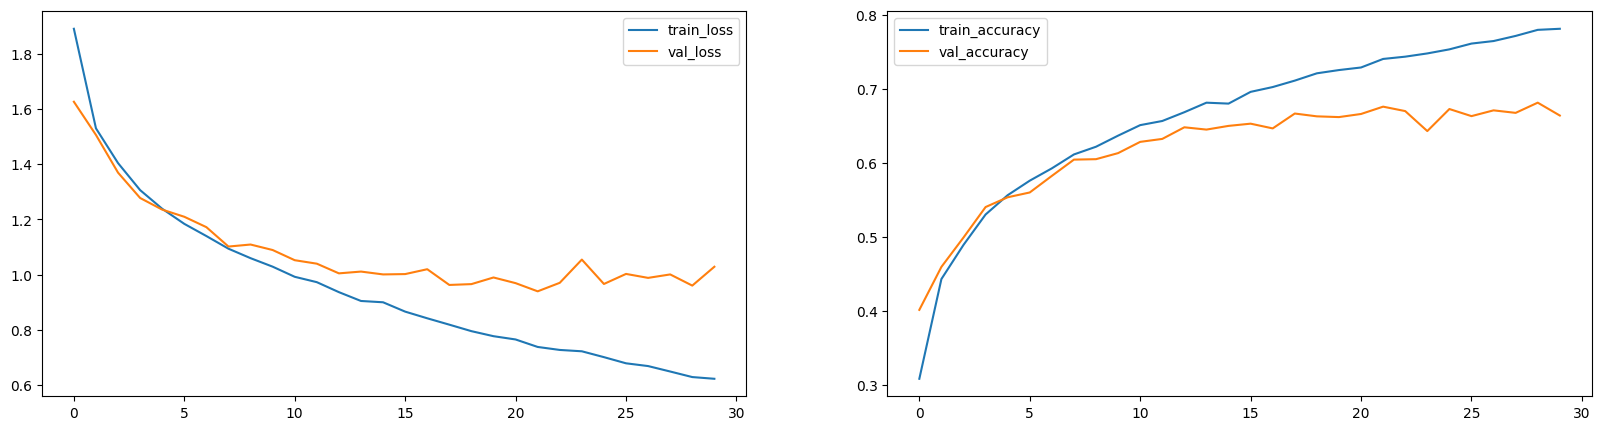

In [20]:
plt.figure(figsize=(20,5))
plt.subplot(1,2,1)
sns.lineplot(x=range(EPOCHS), y=h3.history['loss'], label='train_loss')
sns.lineplot(x=range(EPOCHS), y=h3.history['val_loss'], label='val_loss')

plt.subplot(1,2,2)
sns.lineplot(x=range(EPOCHS), y=h3.history['accuracy'], label='train_accuracy')
sns.lineplot(x=range(EPOCHS), y=h3.history['val_accuracy'], label='val_accuracy')

# L2 regularization

In [21]:
model = Sequential()
model.add(Conv2D(filters=16, kernel_size=(2,2), input_shape=IMG_SHAPE, padding='same', activation='relu', kernel_regularizer=l2(L2)))
model.add(MaxPooling2D(pool_size=2))

model.add(Conv2D(filters=32, kernel_size=(2,2), padding='same', activation='relu', kernel_regularizer=l2(L2)))
model.add(MaxPooling2D(pool_size=2))

model.add(Conv2D(filters=64, kernel_size=(2,2), padding='same', activation='relu', kernel_regularizer=l2(L2)))
model.add(MaxPooling2D(pool_size=2))

model.add(Conv2D(filters=128, kernel_size=(2,2), padding='same', activation='relu', kernel_regularizer=l2(L2)))
model.add(MaxPooling2D(pool_size=2))

model.add(Flatten())
model.add(Dense(128, activation='relu'))
#output layer
model.add(Dense(CLS,activation = 'softmax'))
print(model.summary())

Model: "sequential_2"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_8 (Conv2D)           (None, 32, 32, 16)        208       
                                                                 
 max_pooling2d_8 (MaxPoolin  (None, 16, 16, 16)        0         
 g2D)                                                            
                                                                 
 conv2d_9 (Conv2D)           (None, 16, 16, 32)        2080      
                                                                 
 max_pooling2d_9 (MaxPoolin  (None, 8, 8, 32)          0         
 g2D)                                                            
                                                                 
 conv2d_10 (Conv2D)          (None, 8, 8, 64)          8256      
                                                                 
 max_pooling2d_10 (MaxPooli  (None, 4, 4, 64)         

In [22]:
model.compile(loss='categorical_crossentropy', optimizer='adam', metrics=['accuracy'])

In [23]:
h4 = model.fit(x_train, y_train, batch_size = BSIZE, epochs=EPOCHS, validation_split=0.2)

Epoch 1/30
157/157 [==============================] - 5s 32ms/step - loss: 2.2832 - accuracy: 0.2599 - val_loss: 1.9391 - val_accuracy: 0.3628
Epoch 2/30
157/157 [==============================] - 5s 31ms/step - loss: 1.8427 - accuracy: 0.3853 - val_loss: 1.7617 - val_accuracy: 0.4164
Epoch 3/30
157/157 [==============================] - 5s 33ms/step - loss: 1.7117 - accuracy: 0.4379 - val_loss: 1.7208 - val_accuracy: 0.4372
Epoch 4/30
157/157 [==============================] - 5s 32ms/step - loss: 1.6354 - accuracy: 0.4686 - val_loss: 1.6303 - val_accuracy: 0.4753
Epoch 5/30
157/157 [==============================] - 5s 32ms/step - loss: 1.5879 - accuracy: 0.4878 - val_loss: 1.5844 - val_accuracy: 0.4842
Epoch 6/30
157/157 [==============================] - 5s 34ms/step - loss: 1.5490 - accuracy: 0.5035 - val_loss: 1.5498 - val_accuracy: 0.4982
Epoch 7/30
157/157 [==============================] - 5s 32ms/step - loss: 1.5111 - accuracy: 0.5175 - val_loss: 1.4894 - val_accuracy: 0.5218

<Axes: >

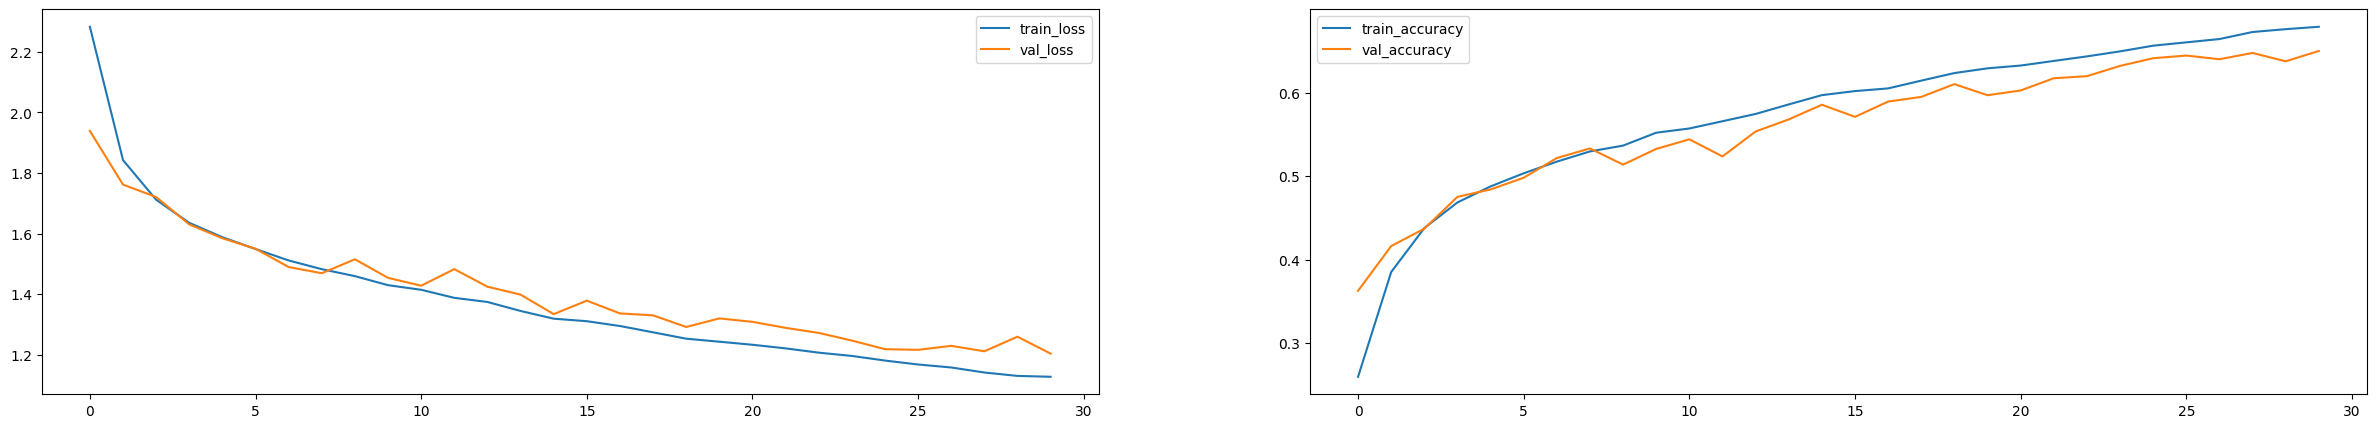

In [24]:
import seaborn as sns
plt.figure(figsize=(30,5))
plt.subplot(1,2,1)
sns.lineplot(x=range(EPOCHS), y=h4.history['loss'], label='train_loss')
sns.lineplot(x=range(EPOCHS), y=h4.history['val_loss'], label='val_loss')

plt.subplot(1,2,2)
sns.lineplot(x=range(EPOCHS), y=h4.history['accuracy'], label='train_accuracy')
sns.lineplot(x=range(EPOCHS), y=h4.history['val_accuracy'], label='val_accuracy')

# Batch Normalization

In [29]:
model = Sequential()
#作法一,
model.add(Conv2D(filters=16, kernel_size=(2,2), input_shape=IMG_SHAPE, padding='same', activation='relu' ,kernel_regularizer=l2(L2)))
model.add(BatchNormalization())
model.add(MaxPooling2D(pool_size=2))

#作法二,先 batch 再activation
# model.add(Conv2D(filters=32, kernel_size=(2,2), padding='same', kernel_regularizer=l2(L2)))
# model.add(BatchNormalization())
# model.add(Activation('relu'))
# model.add(MaxPooling2D(pool_size=2))


model.add(Conv2D(filters=64, kernel_size=(2,2), padding='same', activation='relu',kernel_regularizer=l2(L2)))
model.add(MaxPooling2D(pool_size=2))

model.add(Conv2D(filters=128, kernel_size=(2,2), padding='same', activation='relu',kernel_regularizer=l2(L2)))
model.add(MaxPooling2D(pool_size=2))

model.add(Flatten())
model.add(Dense(128, activation='relu'))
#output layer
model.add(Dense(CLS,activation = 'softmax')) #multiclassification

print(model.summary())

Model: "sequential_7"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_24 (Conv2D)          (None, 32, 32, 16)        208       
                                                                 
 batch_normalization_4 (Bat  (None, 32, 32, 16)        64        
 chNormalization)                                                
                                                                 
 max_pooling2d_24 (MaxPooli  (None, 16, 16, 16)        0         
 ng2D)                                                           
                                                                 
 conv2d_25 (Conv2D)          (None, 16, 16, 64)        4160      
                                                                 
 max_pooling2d_25 (MaxPooli  (None, 8, 8, 64)          0         
 ng2D)                                                           
                                                      

In [30]:
model.compile(loss='categorical_crossentropy', optimizer='adam', metrics=['accuracy'])

In [31]:
h = model.fit(x_train, y_train, batch_size = BSIZE, epochs=EPOCHS, validation_split=0.2)

Epoch 1/30
157/157 [==============================] - 9s 53ms/step - loss: 1.9388 - accuracy: 0.4394 - val_loss: 2.3678 - val_accuracy: 0.2716
Epoch 2/30
157/157 [==============================] - 8s 53ms/step - loss: 1.4453 - accuracy: 0.5717 - val_loss: 1.9946 - val_accuracy: 0.3898
Epoch 3/30
157/157 [==============================] - 10s 62ms/step - loss: 1.2650 - accuracy: 0.6222 - val_loss: 1.3933 - val_accuracy: 0.6042
Epoch 4/30
157/157 [==============================] - 9s 56ms/step - loss: 1.1672 - accuracy: 0.6494 - val_loss: 1.2552 - val_accuracy: 0.6201
Epoch 5/30
157/157 [==============================] - 8s 53ms/step - loss: 1.0862 - accuracy: 0.6747 - val_loss: 1.1316 - val_accuracy: 0.6632
Epoch 6/30
157/157 [==============================] - 9s 54ms/step - loss: 1.0270 - accuracy: 0.6971 - val_loss: 1.0807 - val_accuracy: 0.6762
Epoch 7/30
157/157 [==============================] - 8s 54ms/step - loss: 0.9762 - accuracy: 0.7122 - val_loss: 1.1036 - val_accuracy: 0.664

<Axes: >

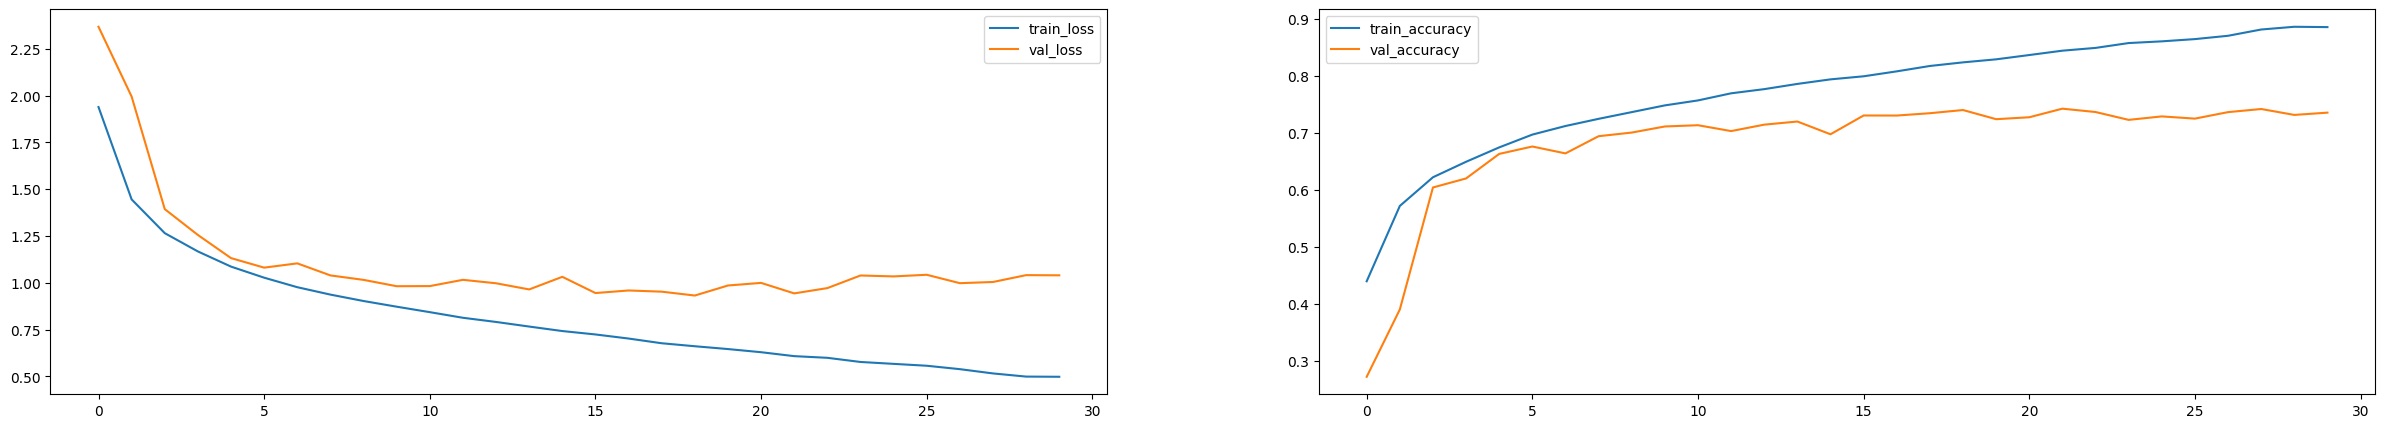

In [32]:
plt.figure(figsize=(30,5))
plt.subplot(1,2,1)
sns.lineplot(x=range(EPOCHS), y=h.history['loss'], label='train_loss')
sns.lineplot(x=range(EPOCHS), y=h.history['val_loss'], label='val_loss')

plt.subplot(1,2,2)
sns.lineplot(x=range(EPOCHS), y=h.history['accuracy'], label='train_accuracy')
sns.lineplot(x=range(EPOCHS), y=h.history['val_accuracy'], label='val_accuracy')

# Learning decay

In [33]:
from tensorflow.keras.optimizers.schedules import CosineDecay
from tensorflow.keras.callbacks import LearningRateScheduler
from tensorflow.keras.optimizers import Adam

In [34]:
inir_lr=1e-2 #0.01
decay_steps = 20
alpha = 1e-2

Text(0, 0.5, 'Learning rate')

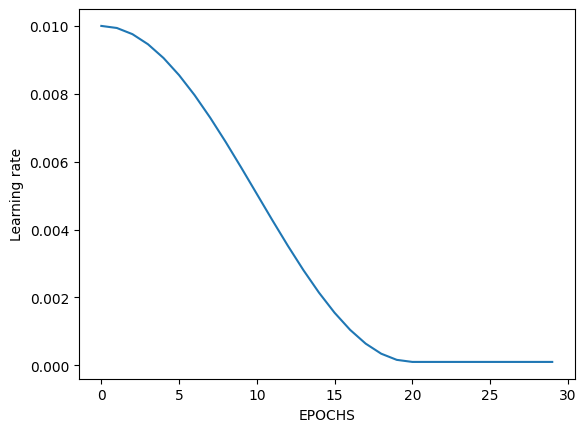

In [35]:
cos_dec = CosineDecay(inir_lr, decay_steps, alpha)
sns.lineplot(x=range(EPOCHS), y=cos_dec(range(EPOCHS)))
plt.xlabel('EPOCHS')
plt.ylabel('Learning rate')

In [37]:
model = Sequential()
model.add(Conv2D(filters=16, kernel_size=(2,2), input_shape=IMG_SHAPE, padding='same', activation='relu'))
model.add(MaxPooling2D(pool_size=2))

model.add(Conv2D(filters=32, kernel_size=(2,2), padding='same', activation='relu'))
model.add(MaxPooling2D(pool_size=2))

model.add(Conv2D(filters=64, kernel_size=(2,2), padding='same', activation='relu'))
model.add(MaxPooling2D(pool_size=2))

model.add(Conv2D(filters=128, kernel_size=(2,2), padding='same', activation='relu'))
model.add(MaxPooling2D(pool_size=2))

model.add(Flatten())
model.add(Dense(128, activation='relu'))
#output layer
model.add(Dense(CLS,activation = 'softmax')) #multiclassification

# setting learing rate
opt = Adam(lr=inir_lr)
print(model.summary())

Model: "sequential_9"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_31 (Conv2D)          (None, 32, 32, 16)        208       
                                                                 
 max_pooling2d_31 (MaxPooli  (None, 16, 16, 16)        0         
 ng2D)                                                           
                                                                 
 conv2d_32 (Conv2D)          (None, 16, 16, 32)        2080      
                                                                 
 max_pooling2d_32 (MaxPooli  (None, 8, 8, 32)          0         
 ng2D)                                                           
                                                                 
 conv2d_33 (Conv2D)          (None, 8, 8, 64)          8256      
                                                                 
 max_pooling2d_33 (MaxPooli  (None, 4, 4, 64)         

In [38]:
model.compile(loss='categorical_crossentropy', optimizer=opt, metrics=['accuracy'])

In [39]:
lrs = LearningRateScheduler(CosineDecay(inir_lr, decay_steps,alpha), verbose=1)
h = model.fit(x_train, y_train, batch_size = BSIZE, epochs=EPOCHS, validation_split=0.2, callbacks=[lrs])


Epoch 1: LearningRateScheduler setting learning rate to 0.009999999776482582.
Epoch 1/30
157/157 [==============================] - 6s 34ms/step - loss: 1.8864 - accuracy: 0.2812 - val_loss: 1.6458 - val_accuracy: 0.3787 - lr: 0.0100

Epoch 2: LearningRateScheduler setting learning rate to 0.009939056821167469.
Epoch 2/30
157/157 [==============================] - 6s 36ms/step - loss: 1.5144 - accuracy: 0.4337 - val_loss: 1.4136 - val_accuracy: 0.4802 - lr: 0.0099

Epoch 3: LearningRateScheduler setting learning rate to 0.00975772924721241.
Epoch 3/30
157/157 [==============================] - 5s 31ms/step - loss: 1.3747 - accuracy: 0.4976 - val_loss: 1.5546 - val_accuracy: 0.4566 - lr: 0.0098

Epoch 4: LearningRateScheduler setting learning rate to 0.009460481815040112.
Epoch 4/30
157/157 [==============================] - 6s 36ms/step - loss: 1.2963 - accuracy: 0.5281 - val_loss: 1.4139 - val_accuracy: 0.5048 - lr: 0.0095

Epoch 5: LearningRateScheduler setting learning rate to 0.00

<Axes: >

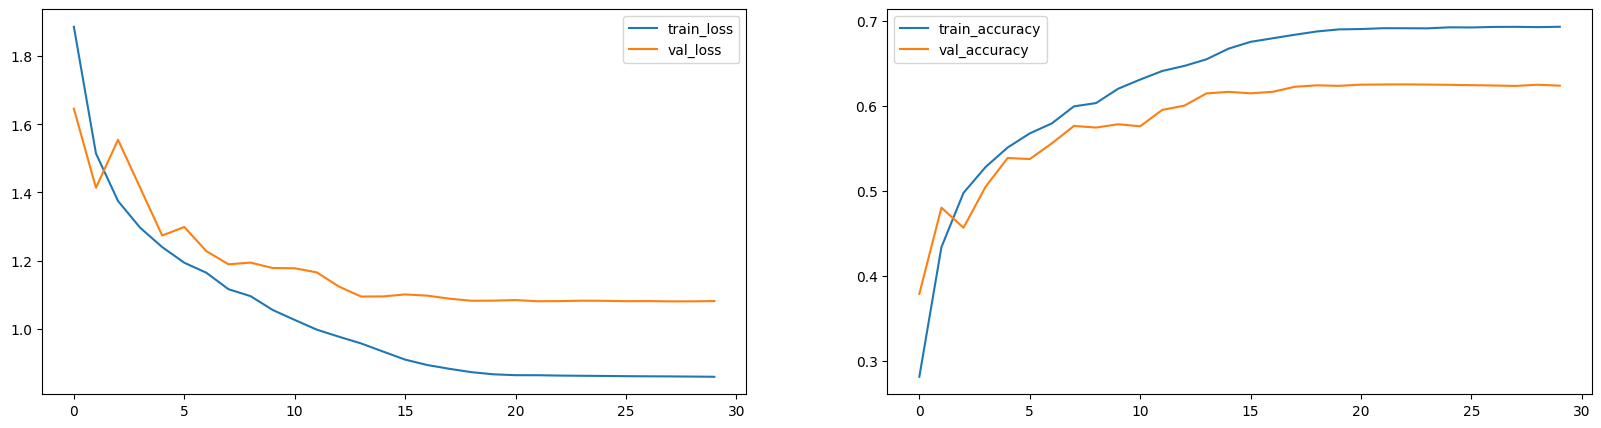

In [40]:
import seaborn as sns
plt.figure(figsize=(20,5))
plt.subplot(1,2,1)
sns.lineplot(x=range(EPOCHS), y=h.history['loss'], label='train_loss')
sns.lineplot(x=range(EPOCHS), y=h.history['val_loss'], label='val_loss')

plt.subplot(1,2,2)
sns.lineplot(x=range(EPOCHS), y=h.history['accuracy'], label='train_accuracy')
sns.lineplot(x=range(EPOCHS), y=h.history['val_accuracy'], label='val_accuracy')

# Warmup

Reference : https://www.kaggle.com/code/digvijayyadav/getting-started-with-tfrecords

exponetial decay + warm up

In [42]:
def get_lr_callback(batch_size=8):
    lr_start   = 0.000005
    lr_max     = 0.00000125 * batch_size  #最高提到哪裡
    lr_min     = 0.000001
    lr_ramp_ep = 5    #warmup 次數
    lr_sus_ep  = 0
    lr_decay   = 0.8

    # call back 要用的
    def lrfn(epoch):
        if epoch < lr_ramp_ep:  #算(lr_max-lr_min)/5
            lr = (lr_max - lr_start) / lr_ramp_ep * epoch + lr_start
        elif epoch < lr_ramp_ep + lr_sus_ep:
            lr = lr_max
        else:  #learing rate decay
            lr = (lr_max - lr_min) * lr_decay**(epoch - lr_ramp_ep - lr_sus_ep) + lr_min
        return lr

    lr_callback = tf.keras.callbacks.LearningRateScheduler(lrfn, verbose=1)  #verbose=1
    return lr_callback

Text(0, 0.5, 'Learning rate')

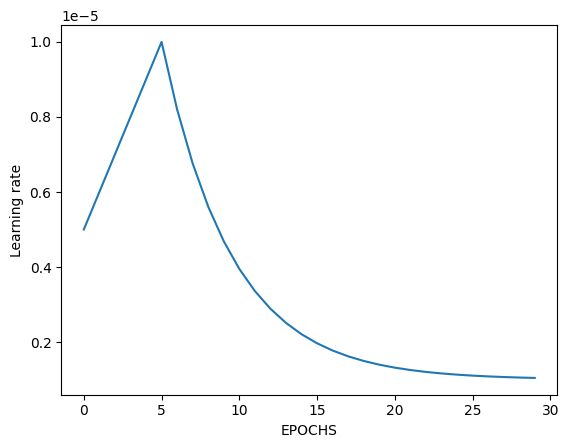

In [43]:
lrs=get_lr_callback()
sns.lineplot(x=range(EPOCHS), y= [ lrs.schedule(e) for e in range(EPOCHS)])
plt.xlabel('EPOCHS')
plt.ylabel('Learning rate')

In [44]:
model = Sequential()
model.add(Conv2D(filters=16, kernel_size=(2,2), input_shape=IMG_SHAPE, padding='same', activation='relu'))
model.add(MaxPooling2D(pool_size=2))

model.add(Conv2D(filters=32, kernel_size=(2,2), padding='same', activation='relu'))
model.add(MaxPooling2D(pool_size=2))

model.add(Conv2D(filters=64, kernel_size=(2,2), padding='same', activation='relu'))
model.add(MaxPooling2D(pool_size=2))

model.add(Conv2D(filters=128, kernel_size=(2,2), padding='same', activation='relu'))
model.add(MaxPooling2D(pool_size=2))

model.add(Flatten())
model.add(Dense(128, activation='relu'))
#output layer
model.add(Dense(CLS,activation = 'softmax')) #multiclassification
print(model.summary())


Model: "sequential_10"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_35 (Conv2D)          (None, 32, 32, 16)        208       
                                                                 
 max_pooling2d_35 (MaxPooli  (None, 16, 16, 16)        0         
 ng2D)                                                           
                                                                 
 conv2d_36 (Conv2D)          (None, 16, 16, 32)        2080      
                                                                 
 max_pooling2d_36 (MaxPooli  (None, 8, 8, 32)          0         
 ng2D)                                                           
                                                                 
 conv2d_37 (Conv2D)          (None, 8, 8, 64)          8256      
                                                                 
 max_pooling2d_37 (MaxPooli  (None, 4, 4, 64)        

In [45]:
opt = Adam(lr= inir_lr)
model.compile(loss='categorical_crossentropy', optimizer=opt, metrics=['accuracy'])

In [46]:
# setup learing rate scheduler
# lrs = LearningRateScheduler(CosineDecay(inir_lr, decay_steps, alpha), verbose=1)  #verbose 每次做完給我看 lrs 是多少
# warmup
lrs = get_lr_callback()

In [47]:
h = model.fit(x_train, y_train, batch_size = BSIZE, epochs=EPOCHS, validation_split=0.2, callbacks=[lrs])


Epoch 1: LearningRateScheduler setting learning rate to 5e-06.
Epoch 1/30
157/157 [==============================] - 6s 36ms/step - loss: 2.3008 - accuracy: 0.1066 - val_loss: 2.2988 - val_accuracy: 0.1223 - lr: 5.0000e-06

Epoch 2: LearningRateScheduler setting learning rate to 6e-06.
Epoch 2/30
157/157 [==============================] - 6s 35ms/step - loss: 2.2978 - accuracy: 0.1431 - val_loss: 2.2951 - val_accuracy: 0.1588 - lr: 6.0000e-06

Epoch 3: LearningRateScheduler setting learning rate to 7.000000000000001e-06.
Epoch 3/30
157/157 [==============================] - 5s 32ms/step - loss: 2.2935 - accuracy: 0.1590 - val_loss: 2.2902 - val_accuracy: 0.1590 - lr: 7.0000e-06

Epoch 4: LearningRateScheduler setting learning rate to 8.000000000000001e-06.
Epoch 4/30
157/157 [==============================] - 6s 36ms/step - loss: 2.2880 - accuracy: 0.1631 - val_loss: 2.2834 - val_accuracy: 0.1666 - lr: 8.0000e-06

Epoch 5: LearningRateScheduler setting learning rate to 9.0000000000000

<Axes: >

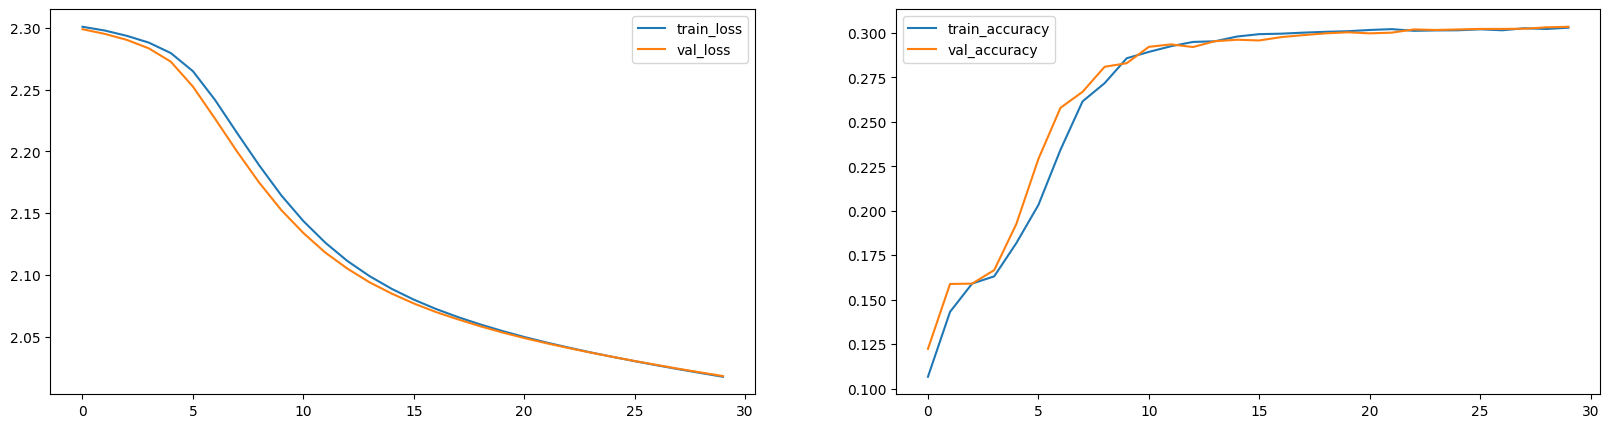

In [48]:
import seaborn as sns
plt.figure(figsize=(20,5))
plt.subplot(1,2,1)
sns.lineplot(x=range(EPOCHS), y=h.history['loss'], label='train_loss')
sns.lineplot(x=range(EPOCHS), y=h.history['val_loss'], label='val_loss')

plt.subplot(1,2,2)
sns.lineplot(x=range(EPOCHS), y=h.history['accuracy'], label='train_accuracy')
sns.lineplot(x=range(EPOCHS), y=h.history['val_accuracy'], label='val_accuracy')

# Data Augumentation

In [49]:
from tensorflow.keras.preprocessing.image import ImageDataGenerator

In [50]:
train_datagen = ImageDataGenerator(
#rescale=1./255, # 每一像素都做正規化normalization
rotation_range=30, # 隨機將圖片轉動角度a range within which to randomly rotate pictures
width_shift_range=0.1, # 水平位移圖片shift the image to the left or right(horizontal shifts)
height_shift_range=0.1, # 上下位移圖片It works same as width_shift_range but shift vertically(up or down)
#zoom_range=0.4, # 隨機將圖片放大randomly zooming inside pictures
#channel_shift_range=50, # 隨機修正圖片的􀀀色
horizontal_flip=True, # 隨機水平翻轉圖片randomly flipping half of the images horizontally
fill_mode="constant", # 水平翻轉後，偏移後，多出來的空間要怎􀀀填色the strategy used for filling in newly created pixels
validation_split = 0.2 # 80% 的圖片會用來做訓練use 75% of images for training, 25% for validation
)

In [51]:
train_generator = train_datagen.flow(x_train, y_train, batch_size=BSIZE, subset='training')

In [52]:
val_datagen = ImageDataGenerator(
#rescale=1./255, # 每一像素都做正規化
validation_split = 0.25
)

In [53]:
val_generator = val_datagen.flow(x_train, y_train, batch_size=BSIZE, subset='validation')

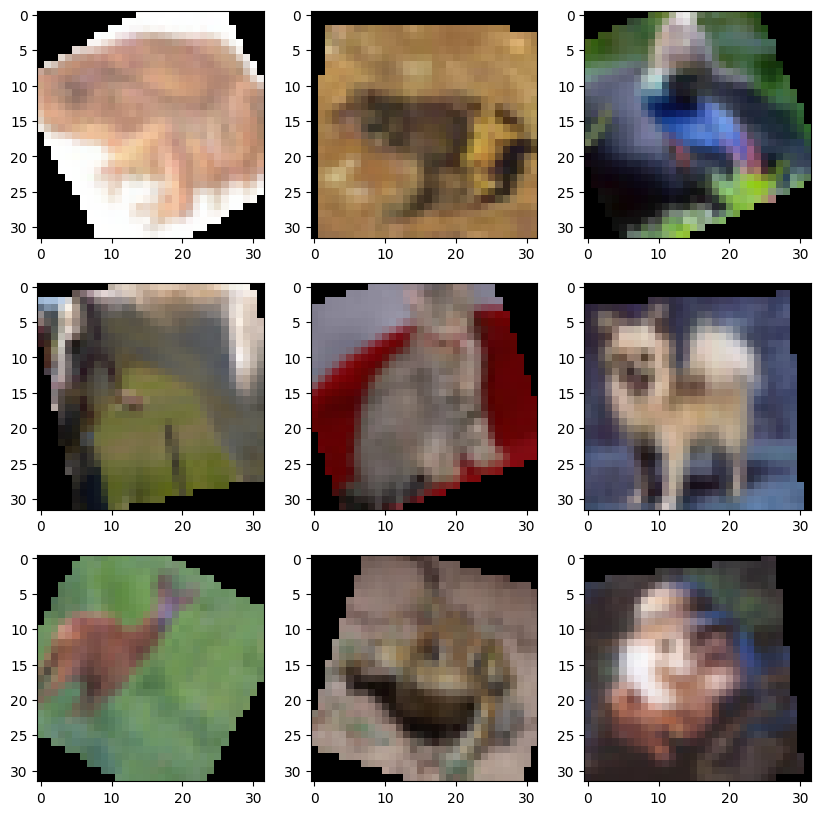

In [56]:
imgs, labels = train_generator.next()
plt.figure(figsize=(10, 10))
for i in range(9):
  plt.subplot(3, 3, i+1)
  plt.imshow(imgs[i])
train_generator.reset()

In [55]:
model = Sequential()
model.add(Conv2D(filters=16, kernel_size=(2,2), input_shape=IMG_SHAPE, padding='same', activation='relu'))
model.add(MaxPooling2D(pool_size=2))

model.add(Conv2D(filters=32, kernel_size=(2,2), padding='same', activation='relu'))
model.add(MaxPooling2D(pool_size=2))

model.add(Conv2D(filters=64, kernel_size=(2,2), padding='same', activation='relu'))
model.add(MaxPooling2D(pool_size=2))

model.add(Conv2D(filters=128, kernel_size=(2,2), padding='same', activation='relu'))
model.add(MaxPooling2D(pool_size=2))

model.add(Flatten())
model.add(Dense(128, activation='relu'))
#output layer
model.add(Dense(CLS,activation = 'softmax')) #multiclassification
print(model.summary())

Model: "sequential_11"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_39 (Conv2D)          (None, 32, 32, 16)        208       
                                                                 
 max_pooling2d_39 (MaxPooli  (None, 16, 16, 16)        0         
 ng2D)                                                           
                                                                 
 conv2d_40 (Conv2D)          (None, 16, 16, 32)        2080      
                                                                 
 max_pooling2d_40 (MaxPooli  (None, 8, 8, 32)          0         
 ng2D)                                                           
                                                                 
 conv2d_41 (Conv2D)          (None, 8, 8, 64)          8256      
                                                                 
 max_pooling2d_41 (MaxPooli  (None, 4, 4, 64)        

In [57]:
model.compile(loss='categorical_crossentropy', optimizer='adam', metrics=['accuracy'])

In [58]:
h = model.fit(train_generator, batch_size = BSIZE, epochs=EPOCHS, validation_data=val_generator)

Epoch 1/30
157/157 [==============================] - 8s 47ms/step - loss: 1.9710 - accuracy: 0.2756 - val_loss: 1.7128 - val_accuracy: 0.3810
Epoch 2/30
157/157 [==============================] - 6s 41ms/step - loss: 1.6792 - accuracy: 0.3874 - val_loss: 1.5639 - val_accuracy: 0.4319
Epoch 3/30
157/157 [==============================] - 7s 44ms/step - loss: 1.5638 - accuracy: 0.4300 - val_loss: 1.4963 - val_accuracy: 0.4634
Epoch 4/30
157/157 [==============================] - 7s 43ms/step - loss: 1.4881 - accuracy: 0.4638 - val_loss: 1.3611 - val_accuracy: 0.5097
Epoch 5/30
157/157 [==============================] - 6s 41ms/step - loss: 1.4257 - accuracy: 0.4856 - val_loss: 1.4491 - val_accuracy: 0.4893
Epoch 6/30
157/157 [==============================] - 7s 43ms/step - loss: 1.3832 - accuracy: 0.4990 - val_loss: 1.2925 - val_accuracy: 0.5318
Epoch 7/30
157/157 [==============================] - 7s 42ms/step - loss: 1.3501 - accuracy: 0.5141 - val_loss: 1.2978 - val_accuracy: 0.5340

<Axes: >

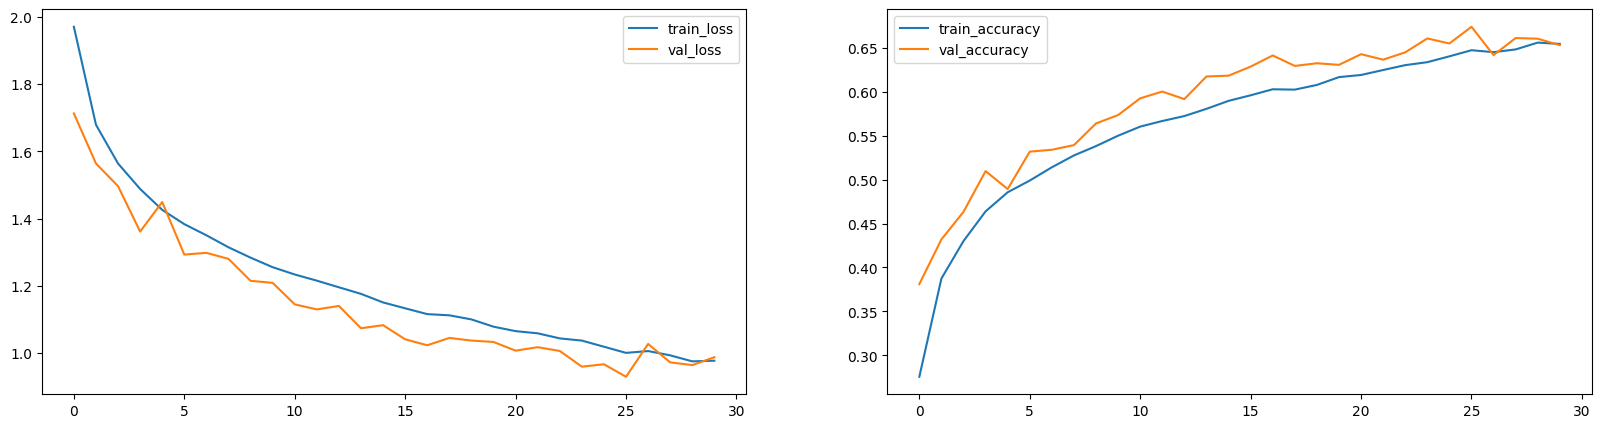

In [59]:
import seaborn as sns
plt.figure(figsize=(20,5))
plt.subplot(1,2,1)
sns.lineplot(x=range(EPOCHS), y=h.history['loss'], label='train_loss')
sns.lineplot(x=range(EPOCHS), y=h.history['val_loss'], label='val_loss')

plt.subplot(1,2,2)
sns.lineplot(x=range(EPOCHS), y=h.history['accuracy'], label='train_accuracy')
sns.lineplot(x=range(EPOCHS), y=h.history['val_accuracy'], label='val_accuracy')